In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np                             #Importing Python Libtraries

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist               #Importing MNIST dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()   #loading taining and testing MNIST data 

(60000, 28, 28)


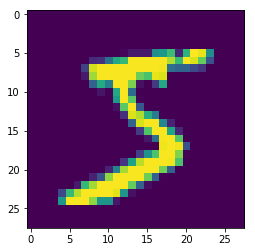

In [21]:
print (X_train.shape)                          #Using matpotlib library to plot the sample training image in dataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)   #Using reshape function to define input dimensions
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32') # Converting datatype to float to get decimal values 
X_test = X_test.astype('float32')
X_train /= 255                      #Dividing the training and test sets by maximum RGB vaules
X_test /= 255

In [24]:
y_train[:10]   

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #Here the Input channel dimension is 1, I/P image (28x28x1) is convolved with (3x3x32) to produce (26x26x32)
                                                                             #and the RF will be (3x3)
model.add(Convolution2D(64, 3, 3, activation='relu'))                        #(26x26x32)is convolved with (3x3x64) to produce (24x24x64) and the RF will be (5x5)
model.add(Convolution2D(128, 3, 3, activation='relu'))                       #(24x24x64)Convolved with (3x3x128) to produce (22x22x128) and the RF will be (7x7)

model.add(MaxPooling2D(pool_size=(2, 2)))                                    #(24x24x128) is maxpooled to produce (11x11x128) and the RF doubles to 14

model.add(Convolution2D(256, 3, 3, activation='relu'))                       #(11x11x128)Convolved with (3x3x256) to produce (9x9x256) and the RF will be (16x16)
model.add(Convolution2D(512, 3, 3, activation='relu'))                       #(9x9x256)Convolved with (3x3x512) to produce (7x7x512) and the RF will be (18x18)
model.add(Convolution2D(1024, 3, 3, activation='relu'))                      #(7x7x512)Convolved with (3x3x1024) to produce (5x5x1024) and the RF will be (20x20)
model.add(Convolution2D(2048, 3, 3, activation='relu'))                      #(5x5x1024)Convolved with (3x3x2048) to produce (3x3x2048) and the RF will be (22x22)
model.add(Convolution2D(10, 3, 3, activation='relu'))                        #(3x3x2048)Convolved with (3x3x10) to produce (1x1x10) and the RF will be (24x24)

model.add(Flatten())                                                         #Flattenig the whole array to 1 axis
model.add(Activation('softmax'))                                             #Applying activation function to it

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/

In [0]:
model.compile(loss='categorical_crossentropy',  #compiling the model
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)   # Training the model using fit fuction

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 1.9040 - acc: 0.2858
Epoch 2/10
60000/60000 [==============================] - 129s 2ms/step - loss: 2.2951 - acc: 0.1026
Epoch 3/10
60000/60000 [==============================] - 139s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 139s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 138s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 138s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 138s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 138s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 138s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 121s 2ms/step - loss: 2.3026 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)  #Testing the model using evaluate functon

In [13]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test) 

In [15]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


### In the above model, the validation accuracy is only 9.8%. This is because the the acivation fuction is used at the last layers which is not desirable for a good network. Now we remove the activation function at the end and check the accuracy.

In [30]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #Here the Input channel dimension is 1, I/P image (28x28x1) is convolved with (3x3x32) to produce (26x26x32)
                                                                             #and the RF will be (3x3)
model.add(Convolution2D(64, 3, 3, activation='relu'))                        #(26x26x32)is convolved with (3x3x64) to produce (24x24x64) and the RF will be (5x5)
model.add(Convolution2D(128, 3, 3, activation='relu'))                       #(24x24x64)Convolved with (3x3x128) to produce (22x22x128) and the RF will be (7x7)

model.add(MaxPooling2D(pool_size=(2, 2)))                                    #(24x24x128) is maxpooled to produce (11x11x128) and the RF doubles to 14

model.add(Convolution2D(256, 3, 3, activation='relu'))                       #(11x11x128)Convolved with (3x3x256) to produce (9x9x256) and the RF will be (16x16)
model.add(Convolution2D(512, 3, 3, activation='relu'))                       #(9x9x256)Convolved with (3x3x512) to produce (7x7x512) and the RF will be (18x18)
model.add(Convolution2D(1024, 3, 3, activation='relu'))                      #(7x7x512)Convolved with (3x3x1024) to produce (5x5x1024) and the RF will be (20x20)
model.add(Convolution2D(2048, 3, 3, activation='relu'))                      #(5x5x1024)Convolved with (3x3x2048) to produce (3x3x2048) and the RF will be (22x22)
model.add(Convolution2D(10, 3, 3))                                           #(3x3x2048)Convolved with (3x3x10) to produce (1x1x10) and the RF will be (24x24)

model.add(Flatten())                                                         #Flattenig the whole array to 1 axis
model.add(Activation('softmax'))                                             #Applying activation function to it

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/

In [31]:
model.compile(loss='categorical_crossentropy',  #compiling the model
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)   # Training the model using fit fuction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.1464 - acc: 0.9549
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0574 - acc: 0.9831
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0410 - acc: 0.9878
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0360 - acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0261 - acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0247 - acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0235 - acc: 0.9933
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0190 - acc: 0.9949
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0189 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0182 - a

### Here we can see the validation accuracy of the model is increased to 99.3%

In [32]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03179505714798529, 0.9932]


In [33]:
y_pred = model.predict(X_test) 
print(y_pred[:9])
print(y_test[:9])

[[4.27207081e-15 5.49925014e-13 5.38716398e-11 1.81185611e-09
  7.76946294e-08 6.74253764e-10 1.15807853e-16 9.99999881e-01
  9.00409088e-12 1.94145269e-08]
 [9.82782090e-15 4.78455275e-13 1.00000000e+00 1.07241842e-14
  8.50157228e-15 2.33178757e-20 2.73919667e-13 7.63573484e-18
  1.11093168e-09 2.07283545e-20]
 [9.49235943e-17 1.00000000e+00 3.10741125e-13 5.08668357e-13
  4.80762408e-09 6.97339755e-11 6.02240697e-14 8.56349783e-11
  1.23216975e-11 3.12873676e-14]
 [9.99999642e-01 5.33634032e-17 1.90108034e-13 1.88804354e-12
  1.20774016e-11 4.53572124e-10 3.41852058e-07 2.64038601e-13
  6.01001757e-12 2.12883513e-11]
 [2.59104482e-14 4.97912292e-14 5.61001332e-13 3.96949292e-13
  1.00000000e+00 5.64054933e-13 8.74446418e-11 6.58238811e-11
  9.54358814e-10 8.36755443e-10]
 [2.77958742e-19 1.00000000e+00 3.63384520e-14 4.27335692e-16
  2.38369324e-10 2.99864253e-15 9.50631535e-16 7.15750348e-10
  3.16887055e-12 1.50884224e-15]
 [5.29341660e-18 1.55390403e-12 1.72575746e-14 3.61499728e